In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('C:/Users/ellac/Documents/data25-visualisations/DataVisualisation/vgsales.csv')

In [5]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [6]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
df = pd.DataFrame(data)

In [8]:
# Check for any duplicate values.
df.duplicated().sum()

0

In [9]:
# Clean up Publisher column to make more uniform. 
df['Publisher'] = df['Publisher'].replace(["Unknown"], "N/A")

In [10]:
# Fill any N/A with a 0.
df = df.fillna(0)
df['Year'] = df['Year'].astype(int)

In [11]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


<AxesSubplot:xlabel='NA_Sales', ylabel='Global_Sales'>

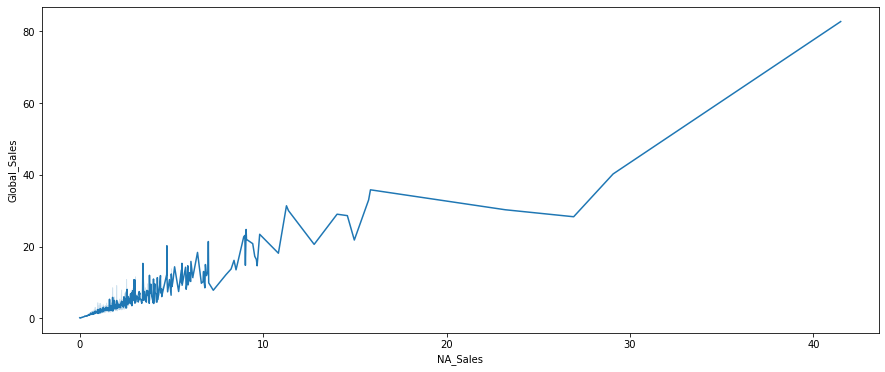

In [38]:
# How much of global sales were made up by North America?
plt.figure(figsize=(15,6))
sb.lineplot(x='NA_Sales', y='Global_Sales', data=df)

<AxesSubplot:xlabel='EU_Sales', ylabel='Global_Sales'>

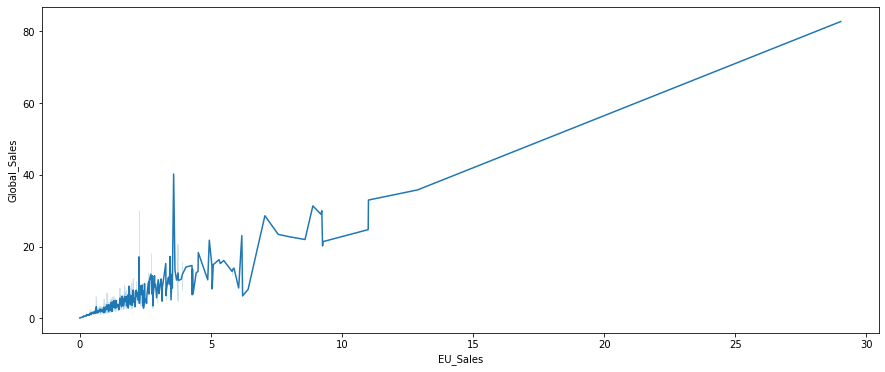

In [39]:
# What about the EU?
plt.figure(figsize=(15,6))
sb.lineplot(x='EU_Sales', y='Global_Sales', data=df)

In [14]:
# Global sales by genre.
df.groupby(df.Genre)
df.sort_values('Global_Sales', inplace = True)

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

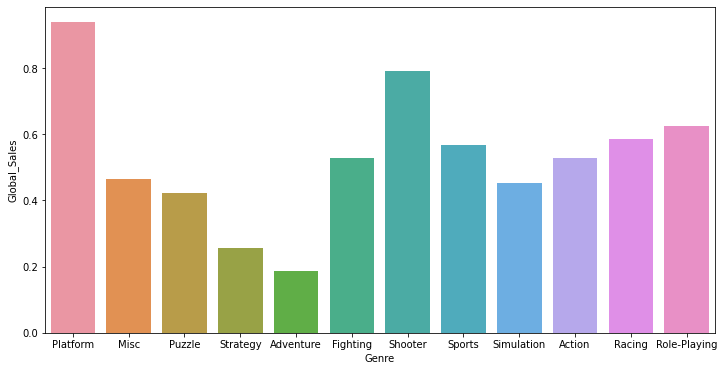

In [15]:
plt.figure(figsize=(12,6))
sb.barplot(x='Genre', y='Global_Sales', data=df, ci=None)

In [16]:
# Global sales by platform.
df.groupby(df.Platform)
df.sort_values('Global_Sales', inplace = True)

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

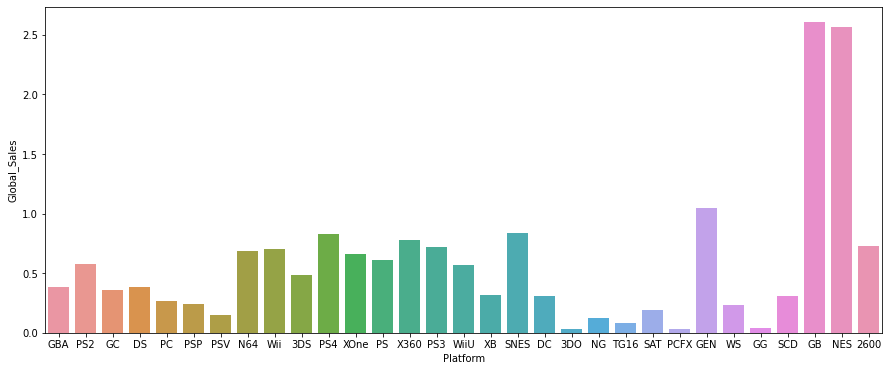

In [22]:
plt.figure(figsize=(15,6))
sb.barplot(x='Platform', y='Global_Sales', data=df, ci=None)

In [27]:
df['Year'] = df['Year'].replace([0], "")
df['Year'] = df['Year'].replace(["N/A"], "")

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

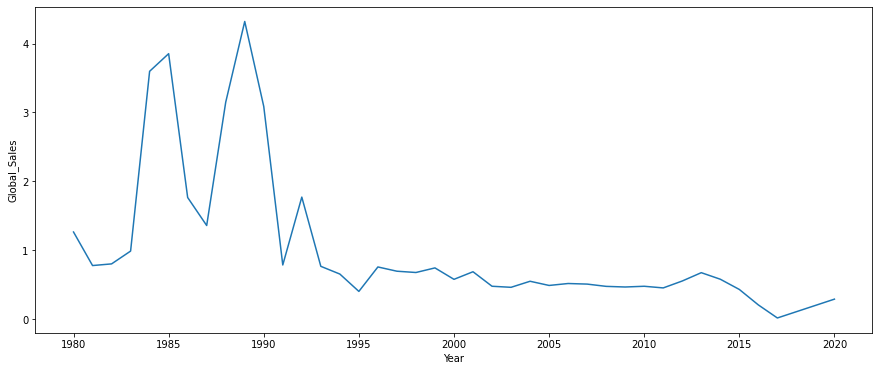

In [37]:
# Show global sales over the years.
plt.figure(figsize=(15,6))
sb.lineplot(x='Year', y='Global_Sales', data=df, ci=None)

In [62]:
# Convert data into helpful new table.
df2 = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [63]:
df2

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16597,2003,0.01,0.00,0.00,0.00
16188,2009,0.00,0.00,0.01,0.00
16187,2007,0.00,0.01,0.00,0.00
16186,2009,0.00,0.01,0.00,0.00
16185,2009,0.00,0.00,0.01,0.00
...,...,...,...,...,...
4,1996,11.27,8.89,10.22,1.00
3,2009,15.75,11.01,3.28,2.96
2,2008,15.85,12.88,3.79,3.31
1,1985,29.08,3.58,6.81,0.77


<AxesSubplot:xlabel='Year', ylabel='value'>

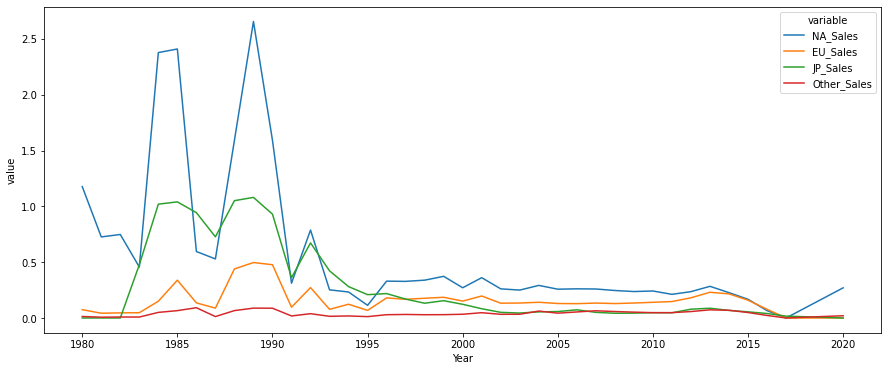

In [78]:
# Compare sales over time for all different regions.
plt.figure(figsize=(15,6))
sb.lineplot(x='Year', y='value', hue='variable', data=pd.melt(df2, ['Year']), ci=None)